阶段一：建立逻辑回归模型

In [35]:
#STEP1：加载数据集
import pandas as pd
df = pd.read_csv("05credit-overdue.csv", header=0) # 加载数据集
df.head()  #查看前5行数据

,debt,income,overdue
0,1.86,4.39,0
1,0.42,4.91,0
2,2.07,1.06,1
3,0.64,1.55,0
4,1.24,2.48,0


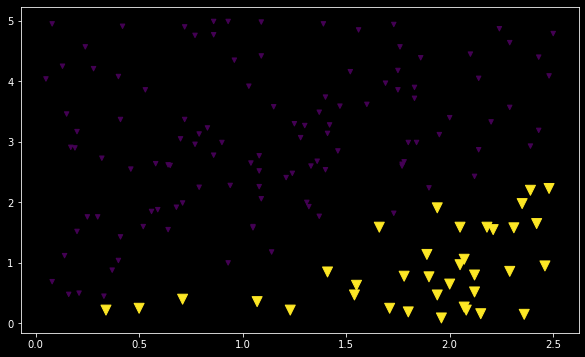

In [36]:
#STEP2：绘制数据的散点图，查看数据分布情况。
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
map_size = {0: 20, 1: 100}
size = list(map(lambda x: map_size[x], df['overdue']))
plt.scatter(df['debt'],df['income'], s=size,c=df['overdue'],marker='v')

In [37]:
#STEP3：定义Sigmoid函数、损失函数，使用梯度下降确定模型参数。

#定义Sigmoid函数
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid
#定义对数损失函数
def loss(h, y):
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss
#定义梯度下降函数
def gradient(X, h, y):
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    return gradient

# 逻辑回归过程
def Logistic_Regression(x, y, lr, num_iter):
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 0

    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)     # 线性函数
        h = sigmoid(z)      # sigmoid 函数
        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g     # 通过学习率 lr 计算步长并执行梯度下降
        z = np.dot(x, w)     # 更新参数到原线性函数中
        h = sigmoid(z)      # 计算 sigmoid 函数值
        l = loss(h, y)        # 计算损失函数值
    return l, w        # 返回迭代后的梯度和参数

In [38]:
#STEP4：初始化模型，并对模型进行训练
import numpy as np

#逻辑回归参数，添加
x = df.values[:,:2]
y = df.values[:,2]

lr = 0.001                 # 学习率
num_iter = 10000          # 迭代次数
# 模型训练
L = Logistic_Regression(x, y, lr, num_iter)
L

(0.1938336837185912, array([ 0.05603937,  0.9925221 , -1.3325938 ]))

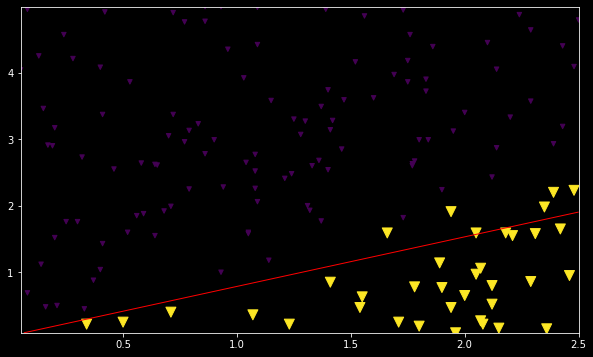

In [39]:
#STEP5：根据得到的参数，绘制模型分类线。
plt.figure(figsize=(10, 6))
map_size = {0: 20, 1: 100}
size = list(map(lambda x: map_size[x], df['overdue']))
plt.scatter(df['debt'],df['income'], s=size,c=df['overdue'],marker='v')

x1_min, x1_max = df['debt'].min(), df['debt'].max(),
x2_min, x2_max = df['income'].min(), df['income'].max(),

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, np.array([L[1][1:3]]).T) + L[1][0]).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors='red');

Text(0, 0.5, 'Loss function')

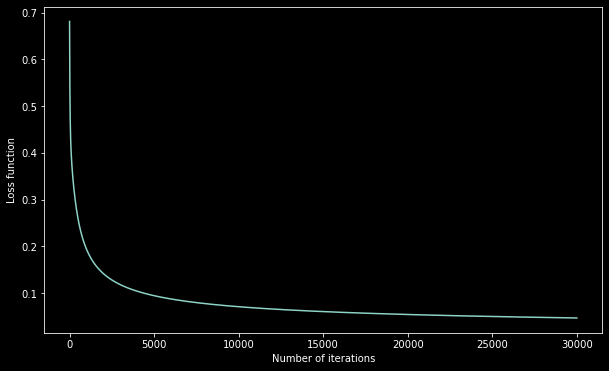

In [40]:
#STEP6：绘制损失函数变化曲线。
def Logistic_Regression(x, y, lr, num_iter):
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])           # 初始化参数为 1

    l_list = []                 # 保存损失函数值
    for i in range(num_iter):    # 梯度下降迭代
        z = np.dot(x, w)       # 线性函数
        h = sigmoid(z)        # sigmoid 函数

        g = gradient(x, h, y)    # 计算梯度
        w -= lr * g      # 通过学习率 lr 计算步长并执行梯度下降

        z = np.dot(x, w)  # 更新参数到原线性函数中
        h = sigmoid(z)   # 计算 sigmoid 函数值

        l = loss(h, y)     # 计算损失函数值
        l_list.append(l)
    return l_list

lr = 0.01          # 学习率
num_iter = 30000  # 迭代次数
l_y = Logistic_Regression(x, y, lr, num_iter)  # 训练

# 绘图
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(l_y))], l_y)
plt.xlabel("Number of iterations")
plt.ylabel("Loss function")

阶段二：对信用卡逾期进行预判

In [41]:
#STEP1：读取数据。
import numpy as np
data=np.array([[20,7000,800,1],[35,2000,2500,0],[27,5000,3000,1],[32,4000,4000,0],[45,2000,3800,0]])
data[:,:3]  

array([[  20, 7000,  800],
       [  35, 2000, 2500],
       [  27, 5000, 3000],
       [  32, 4000, 4000],
       [  45, 2000, 3800]])

C:\Users\mingzi\AppData\Local\Temp/ipykernel_2424/683100319.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)  #elev、azim设置y轴、z轴旋转角度


Text(0.5, 0, 'Income')

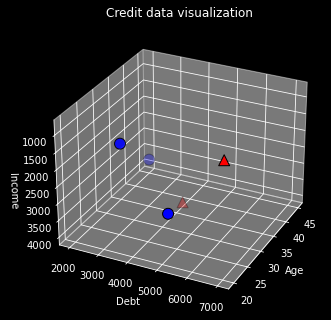

In [42]:
#STEP2：绘图显示数据。
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, axes3d
X1=data[:,0]  #age
X2=data[:,1]  #debt
X3=data[:,2]  #income
Y=data[:,3]   #overdue   
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)  #elev、azim设置y轴、z轴旋转角度
mask = 0
ax.scatter(X1[Y==0], X2[Y==0], X3[Y==0], c='b', s=120, edgecolor='k')
ax.scatter(X1[Y==1], X2[Y==1], X3[Y==1], c='r', marker='^',s=120, edgecolor='k')
ax.set_title('Credit data visualization')   #设置图表标题
ax.set_xlabel("Age")
ax.set_ylabel("Debt")
ax.set_zlabel("Income")

In [43]:
#STEP3：建立逻辑回归模型。
from sklearn import linear_model

#建立逻辑回归模型,添加
lr = linear_model.LogisticRegression()
lr.fit(data[:,:3],data[:,3])

LogisticRegression()

In [44]:
#STEP4：返回预测结果。
display(lr.coef_)
display(lr.intercept_)

array([[-0.00013214,  0.01011435, -0.01303211]])

array([-4.14778233e-05])

C:\Users\mingzi\AppData\Local\Temp/ipykernel_2424/3279100554.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)   #elev、azim设置y轴、z轴旋转角度


Text(0.5, 0, 'Income')

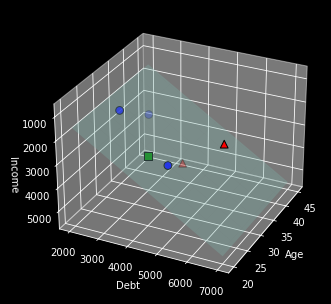

In [45]:
#STEP5：使用参数绘制分类结果图。
coef=lr.coef_[0]
intercept=lr.intercept_[0]
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)   #elev、azim设置y轴、z轴旋转角度
xx = np.linspace(X1.min() - 0.02, X1.max() +0.02, 50) #生成分类面x样本点
yy = np.linspace(X2.min() - 0.02, X2.max() +0.02, 50) #生成分类面y样本点
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2] #生成分类面z样本点
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3) #生成分类面
ax.scatter(X1[Y==0], X2[Y==0], X3[Y==0], c='b',s=60, edgecolor='k')
ax.scatter(X1[Y==1], X2[Y==1], X3[Y==1], c='r', marker='^',s=60, edgecolor='k')
ax.scatter(30,3500,3500, c='g', marker='s',s=60, edgecolor='k')
ax.set_xlabel("Age")
ax.set_ylabel("Debt")
ax.set_zlabel("Income")

C:\Users\mingzi\AppData\Local\Temp/ipykernel_2424/1983976091.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=152, azim=-26)   #elev、azim设置y轴、z轴旋转角度


Text(0.5, 0, 'Income')

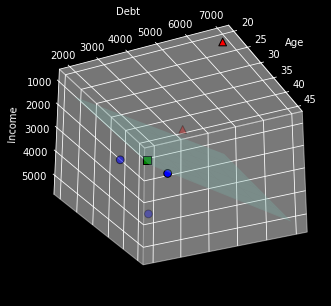

In [46]:
coef=lr.coef_[0]
intercept=lr.intercept_[0]
figure = plt.figure()
ax = Axes3D(figure, elev=152, azim=-26)   #elev、azim设置y轴、z轴旋转角度
xx = np.linspace(X1.min() - 0.02, X1.max() +0.02, 50) #生成分类面x样本点
yy = np.linspace(X2.min() - 0.02, X2.max() +0.02, 50) #生成分类面y样本点
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2] #生成分类面z样本点
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3) #生成分类面
ax.scatter(X1[Y==0], X2[Y==0], X3[Y==0], c='b',s=60, edgecolor='k')
ax.scatter(X1[Y==1], X2[Y==1], X3[Y==1], c='r', marker='^',s=60, edgecolor='k')
ax.scatter(30,3500,3500, c='g', marker='s',s=60, edgecolor='k')
ax.set_xlabel("Age")
ax.set_ylabel("Debt")
ax.set_zlabel("Income")